# Clustering Penguins: An Introduction to Unsupervised Learning

<img src = "https://github.com/jdomyancich/big-data-camp/blob/main/imgs/penguin_huddle.png?raw=true" width = 400>

In biology, classification is fundamental. Traditionally, scientists (taxonomists) would use observable traits—like the size and shape of a fish's fins or the length of a cat's tail. Today, we can collect large amounts of data and use computational tools to help us find these patterns, sometimes in ways that aren't obvious to the human eye. This is a core concept in the field of bioinformatics.

So far, we have been doing supervised learning, where the dataset is labelled. In other words, we know the right answer to the prediction. However, there are machine learning algorithms that can find patterns in unlabelled data to develop groups that can then be assigned labels. This is called **unsupervised learning**.

A great introduction to unsupervised learning is **k-means clustering**. Clustering is an unsupervised learning technique that groups similar data points together. K-means is one of the most popular clustering algorithms due to its simplicity and effectiveness.

In [1]:
# Load the necessary libraries
# data
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Load the Dataset

Now, let's load our dataset. We have a CSV (Comma Separated Values) file called `penguins.csv` which contains data for three different species of penguins collected from the Palmer Archipelago in Antarctica.

In [2]:
# Load the dataset from the csv file into a pandas DataFrame
penguins= pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/penguins_unlabelled.csv')
penguins.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181,3750,MALE
1,Torgersen,39.5,17.4,186,3800,FEMALE
2,Torgersen,40.3,18.0,195,3250,FEMALE
3,Torgersen,36.7,19.3,193,3450,FEMALE
4,Torgersen,39.3,20.6,190,3650,MALE


In [3]:
# Basic statistics
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


### Visualizing the Data

Now for the fun part! Let's create some plots to see if we can visually identify the clusters. A **pairplot** is a great tool that creates scatterplots for every pair of numerical features in our dataset.

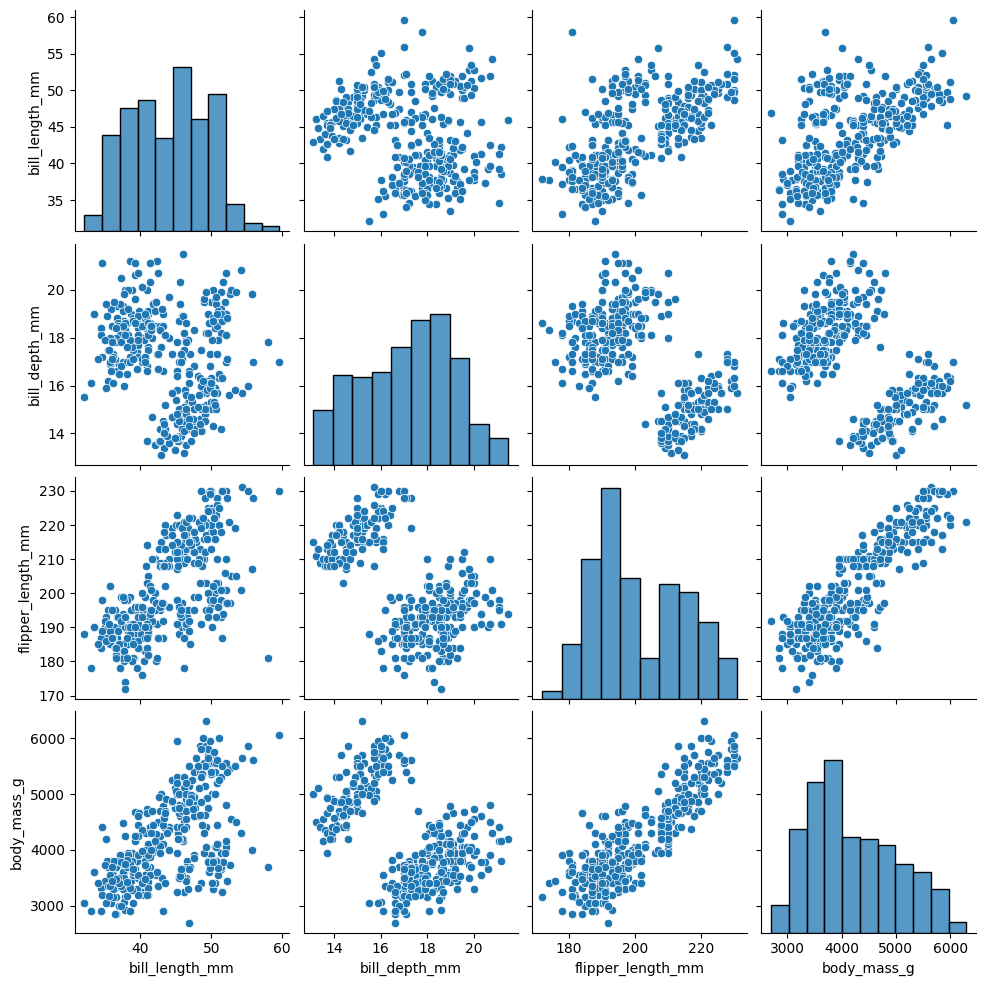

In [4]:
# YOUR CODE HERE
sns.pairplot(penguins)
plt.show()

#### **Think About It:**

1. How many species are represented in the dataset?
2. Which two features seem to be the most effective at separating the species into distinct clusters?

## Preparing the Data for Clustering

Machine learning models work with numbers, so we need to make sure our data is ready.
1.  **Select Features:** We will choose the columns (features) we want to use for clustering.
2.  **Scale the Features:** K-means works by measuring distances. We use `StandardScaler` to scale our features so they have a similar numerical range.

In [6]:
# Select the features for clustering
# YOUR CODE HERE
features = penguins[['bill_length_mm', 'flipper_length_mm']]

# Scale the features
# YOUR CODE HERE
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## The K-Means Algorithm: How Does It Work?

We can see some possible clusters with our eyes, but how can a computer "discover" these clusters on their own? This is where K-Means comes in.

<img src = 'https://github.com/jdomyancich/big-data-camp/blob/main/imgs/kmeans.gif?raw=true'>

**K-Means follows a simple, iterative process:**

1.  **Choose 'k'**: First, we tell the algorithm how many clusters to look for. In our case, we know there are 3 species, so we'll choose **k=3**.
2.  **Initialize Centroids**: The algorithm randomly drops k (3) 'centroids' (think of them as virtual center-points, represented as X's above) onto the plot.
3.  **Assign Clusters**: It then assigns every single data point (each penguin) to its nearest centroid. This forms the initial clusters.
4.  **Update Centroids**: Next, it calculates the new center of each cluster by finding the average position of all the points within it. It moves the centroid to this new center.
5.  **Repeat**: It repeats steps 3 and 4 over and over. With each iteration, the centroids move less and less, until they eventually settle in the center of their respective clusters.

The algorithm has now found the groups without ever knowing the actual species!

## Applying K-Means to the Penguin Data

Let's run the algorithm. Based on the pairplot, `bill_length_mm` and `flipper_length_mm` seemed to separate the clusters well. Let's use those two features to start.

In [7]:
# Create a KMeans model instance
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Fit the model to our features
kmeans.fit(features_scaled)

print("Model training complete!")

Model training complete!


The model has assigned each penguin to a cluster. We can extract these assignments from the model and add them as a new column in the `penguins` dataframe.

In [10]:
# Get the cluster assignments (labels) for each penguin
# YOUR CODE HERE
predicted_labels = kmeans.labels_

# Add the predicted labels back to our cleaned DataFrame
# YOUR CODE HERE
penguins['predicted_cluster'] = predicted_labels

# Let's look at the first few rows with the new column
penguins.tail(20)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,predicted_cluster
314,Biscoe,47.2,15.5,215,4975,FEMALE,1
315,Biscoe,49.1,15.0,228,5500,MALE,1
316,Biscoe,46.8,16.1,215,5500,MALE,1
317,Biscoe,41.7,14.7,210,4700,FEMALE,1
318,Biscoe,53.4,15.8,219,5500,MALE,1
319,Biscoe,43.3,14.0,208,4575,FEMALE,1
320,Biscoe,48.1,15.1,209,5500,MALE,1
321,Biscoe,50.5,15.2,216,5000,FEMALE,1
322,Biscoe,49.8,15.9,229,5950,MALE,1
323,Biscoe,43.5,15.2,213,4650,FEMALE,1


In [11]:
# How many penguins are in each cluster?
# YOUR CODE HERE
penguins['predicted_cluster'].value_counts()

,count
predicted_cluster,
2,146
1,124
0,64


## Visualizing and Evaluating the Results

The algorithm has assigned each penguin to a cluster (0, 1, or 2). How did it do? Let's create a scatter plot just like before, but this time, we'll color the points using our **predicted clusters**.

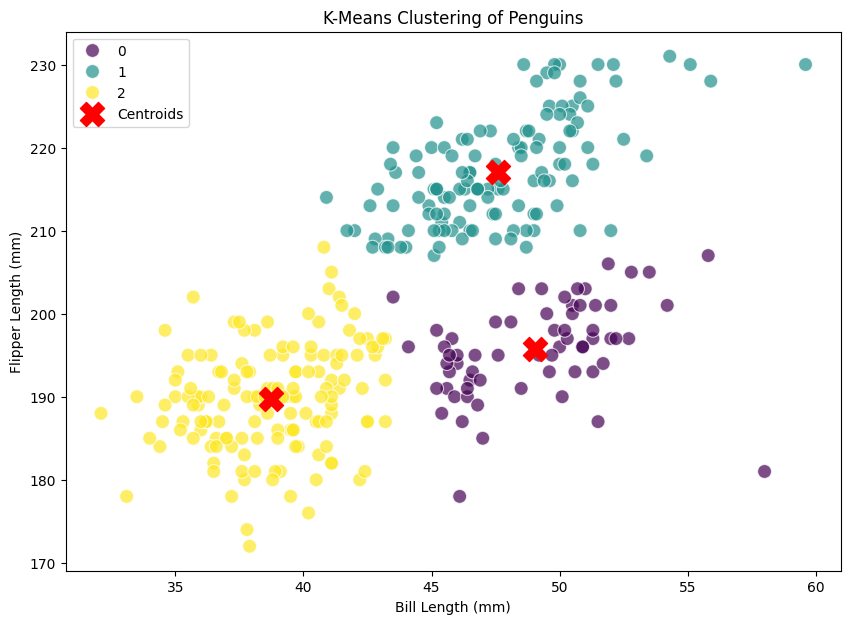

In [12]:
# Get the coordinates of the final cluster centers (the centroids)
centroids = kmeans.cluster_centers_
centroids_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a scatter plot of the penguins, colored by their assigned cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(data=penguins, x='bill_length_mm', y='flipper_length_mm', hue='predicted_cluster', palette='viridis', s=100, alpha=0.7)

# Plot the centroids on top
plt.scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering of Penguins')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend()
plt.show()

### How good was the result?

The plot above looks pretty good! The groups seem well-defined. But how does it compare to the *actual* species? Fortunately, we have another dataset of the same penguins that is labelled with their species. We can add the `predicted_cluster` column to this dataset.

In [14]:
# Load the labelled dataset
penguins_labelled = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/penguins_labelled.csv')
penguins_labelled['predicted_cluster'] = penguins['predicted_cluster']
penguins_labelled.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,predicted_cluster
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE,2
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE,2
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE,2
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE,2
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE,2


Each of the `predicted_cluster` numbers (0, 1, 2) should each associate with a species. We can use a tool called a **cross-tabulation** to compare the true `species` column with our `predicted_cluster` column in order to get some insight into this.

In [16]:
# YOUR CODE HERE
ctab = pd.crosstab(penguins_labelled['species'], penguins_labelled['predicted_cluster'])
ctab

predicted_cluster,0,1,2
species,,,
Adelie,4,1,141
Chinstrap,59,4,5
Gentoo,1,119,0


### Interpret the Results:

1.  Look at the table above. The rows are the true species, and the columns are the clusters the algorithm created.
2.  How many 'Adelie' penguins were put into cluster 0? How many were put into other clusters?
3.  Which species was the algorithm most successful at identifying?
4.  Where did the algorithm get confused?
5.  Overall, do you think the algorithm did a good job of rediscovering the species based only on bill and flipper length?

### Analyze the Results
- Look at the table. Does each cluster primarily correspond to a single species?
- How successful was the K-means algorithm at discovering the different penguin species without being told about them?

## Challenge: Can We Do Better?

What do you think would happen if we gave the algorithm more information? Let's try running K-Means again, but this time, we'll use all four numerical measurements.